In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Configuração para garantir reprodutibilidade e estilo
np.random.seed(42)

# --- GERAÇÃO DOS DADOS ---

# Caso 1: Correlação Perfeita (0,0 até 8,8 -> 9 pontos)
# "Reta que vai de 0,0 até N,N onde pontos estão exatamente onde a reta passa"
x1 = np.arange(9)
y1 = x1  # y é igual a x

# Caso 2: Aleatório / Sem Correlação
# "Dados gerados aleatoriamente com distribuição uniforme no mesmo intervalo"
x2 = np.arange(9)
y2 = np.random.uniform(low=0, high=8, size=9) 

# --- ANÁLISE E PLOTAGEM ---

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Função auxiliar para processar e plotar cada caso
def analisar_plotar(ax, x, y, titulo):
    # 1. Regressão Linear (linregress)
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Cria a linha da reta baseada nos dados encontrados
    linha_regressao = slope * x + intercept
    
    # 2. Covariância
    # np.cov retorna uma matriz. A covariância entre x e y está na posição [0,1]
    covariancia = np.cov(x, y)[0, 1]

    # Plotagem
    ax.scatter(x, y, color='blue', s=100, label='Dados (9 pontos)')
    ax.plot(x, linha_regressao, color='red', linestyle='--', linewidth=2, label=f'Reta: y={slope:.2f}x + {intercept:.2f}')
    
    # Configurações do Gráfico
    ax.set_title(titulo, fontsize=14, weight='bold')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_xlim(-1, 9)
    ax.set_ylim(-1, 9)
    ax.grid(True, linestyle=':', alpha=0.6)
    ax.legend()
    
    # Exibindo Estatísticas no Gráfico
    texto_stats = (
        f"Slope (Declive): {slope:.4f}\n"
        f"R-squared: {r_value**2:.4f}\n"
        f"P-value: {p_value:.4e}\n"
        f"Covariância: {covariancia:.4f}"
    )
    # Coloca uma caixa de texto com os dados
    ax.text(0.05, 0.95, texto_stats, transform=ax.transAxes, fontsize=11,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    return p_value, covariancia, slope

# Executa para o Gráfico 1
p1, cov1, m1 = analisar_plotar(ax1, x1, y1, "Caso 1: Correlação Perfeita")

# Executa para o Gráfico 2
p2, cov2, m2 = analisar_plotar(ax2, x2, y2, "Caso 2: Distribuição Aleatória")

plt.tight_layout()
plt.show()


print(f"FIGURA 1 (Perfeita):")
print(f" > P-value: {p1:.4e}, Covariância: {cov1:.4f}, Reta: Inclinação de {m1:.1f}")
print("\n")
print(f"FIGURA 2 (Aleatória):")
print(f" > P-value: {p2:.4f}, Covariância: {cov2:.4f}, Reta: Inclinação de {m2:.2f}. ")

Como podemos analisar na figura Figura 1, o P-Value é praticamente zero, oque nos mostra que esses dados estão alinhados de mais para serem coincidência, a Covariância indica o quanto alterar o valor A influencia em B, já a inclinação, vai nos indicar que essa variação é positiva, A aumenta com o crescimento de B. Já no outro caso, nós vemos um típico caso de não influência, pois os pontos são gerados aleatoriamente, sem que A tenha relação com B o P-Value se mostra bem auto, A Covariância, mostra que a alteração de A, pouco afeta B, com e a inclinação é quase paralela ao eixo x

In [2]:

# ============================================================
# ANÁLISE DE INTERVALOS DE CONFIANÇA - FEIJOADA DO RU
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Dados pré-definidos: "Pedaços de linguiça da feijoada do RU"
# Lista: [0,1,1,3,2,1]
# Interpretação: 
#   - Posição 0 (0 pedaços): 1 pessoa
#   - Posição 1 (1 pedaço): 1 pessoa
#   - Posição 2 (2 pedaços): 1 pessoa
#   - Posição 3 (3 pedaços): 3 pessoas
#   - Posição 4 (4 pedaços): 2 pessoas
#   - Posição 5 (5 pedaços): 1 pessoa

# Expandir os dados conforme a frequência
contagem = [0, 1, 1, 3, 2, 1]
amostra_feijoada = []

for pedacos, frequencia in enumerate(contagem):
    amostra_feijoada.extend([pedacos] * frequencia)

amostra_feijoada = np.array(amostra_feijoada)

print("=" * 60)
print("ANÁLISE: Pedaços de Linguiça da Feijoada do RU")
print("=" * 60)
print(f"Amostra expandida: {amostra_feijoada}")
print(f"Total de pessoas: {len(amostra_feijoada)}")
print()

# --- CÁLCULO DE ESTATÍSTICAS ---
media = np.mean(amostra_feijoada)
desvio_padrao = np.std(amostra_feijoada, ddof=1)  # ddof=1 para amostra
n = len(amostra_feijoada)
erro_padrao = desvio_padrao / np.sqrt(n)

print(f"Média da amostra: {media:.4f} pedaços")
print(f"Desvio padrão: {desvio_padrao:.4f}")
print(f"Tamanho da amostra (n): {n}")
print(f"Erro padrão: {erro_padrao:.4f}")
print()

# --- CÁLCULO DOS INTERVALOS DE CONFIANÇA ---
niveis_confianca = [90, 95, 99]
intervalos = {}

print("INTERVALOS DE CONFIANÇA:")
print("-" * 60)

for nivel in niveis_confianca:
    # Nível de significância (alpha)
    alpha = 1 - (nivel / 100)
    
    # Valor crítico t (usando distribuição t de Student)
    t_critico = stats.t.ppf(1 - alpha / 2, df=n-1)
    
    # Margem de erro
    margem_erro = t_critico * erro_padrao
    
    # Intervalo de confiança
    limite_inferior = media - margem_erro
    limite_superior = media + margem_erro
    
    intervalos[nivel] = {
        'limite_inf': limite_inferior,
        'limite_sup': limite_superior,
        'margem_erro': margem_erro,
        't_critico': t_critico
    }
    
    print(f"\n{nivel}% de Confiança:")
    print(f"  t crítico: {t_critico:.4f}")
    print(f"  Margem de erro: ±{margem_erro:.4f}")
    print(f"  Intervalo: [{limite_inferior:.4f}, {limite_superior:.4f}]")

print("\n" + "=" * 60)


ANÁLISE: Pedaços de Linguiça da Feijoada do RU
Amostra expandida: [1 2 3 3 3 4 4 5]
Total de pessoas: 8

Média da amostra: 3.1250 pedaços
Desvio padrão: 1.2464
Tamanho da amostra (n): 8
Erro padrão: 0.4407

INTERVALOS DE CONFIANÇA:
------------------------------------------------------------

90% de Confiança:
  t crítico: 1.8946
  Margem de erro: ±0.8349
  Intervalo: [2.2901, 3.9599]

95% de Confiança:
  t crítico: 2.3646
  Margem de erro: ±1.0420
  Intervalo: [2.0830, 4.1670]

99% de Confiança:
  t crítico: 3.4995
  Margem de erro: ±1.5421
  Intervalo: [1.5829, 4.6671]



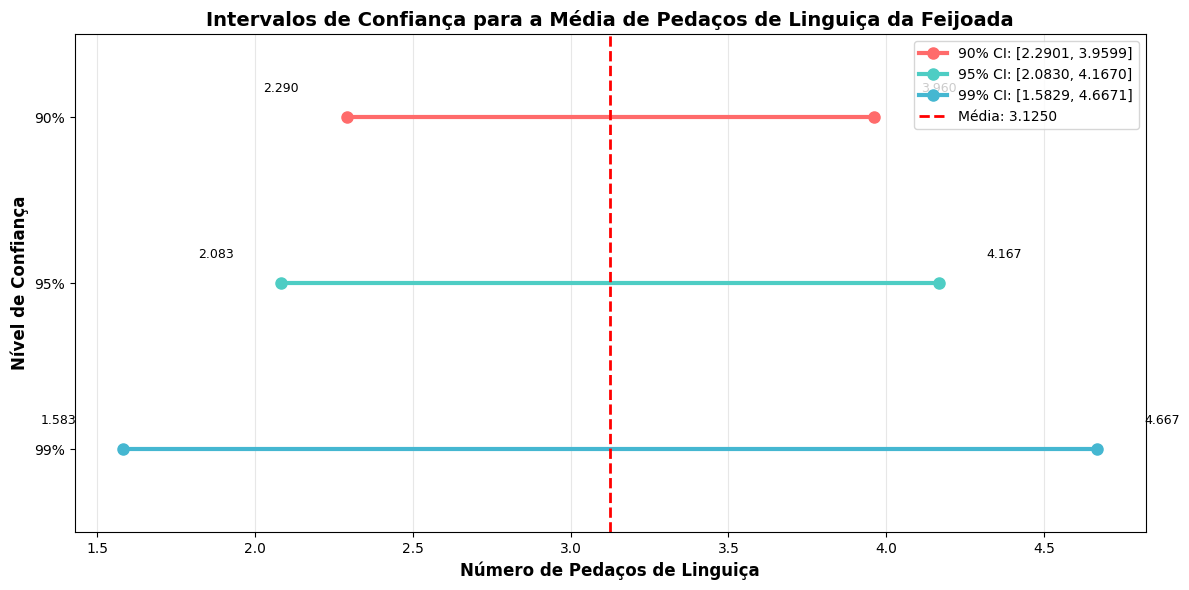


Gráfico exibido: Visualização dos Intervalos de Confiança


In [3]:

# --- VISUALIZAÇÃO DOS INTERVALOS DE CONFIANÇA ---

fig, ax = plt.subplots(figsize=(12, 6))

# Cores para cada intervalo
cores = ['#FF6B6B', '#4ECDC4', '#45B7D1']
y_positions = [3, 2, 1]

# Plotar cada intervalo de confiança
for idx, (nivel, y_pos) in enumerate(zip(niveis_confianca, y_positions)):
    inf = intervalos[nivel]['limite_inf']
    sup = intervalos[nivel]['limite_sup']
    
    # Desenhar a linha do intervalo
    ax.plot([inf, sup], [y_pos, y_pos], 'o-', linewidth=3, markersize=8, 
            color=cores[idx], label=f'{nivel}% CI: [{inf:.4f}, {sup:.4f}]')
    
    # Adicionar os valores dos limites na linha
    ax.text(inf - 0.15, y_pos + 0.15, f'{inf:.3f}', fontsize=9, ha='right')
    ax.text(sup + 0.15, y_pos + 0.15, f'{sup:.3f}', fontsize=9, ha='left')

# Plotar a média
ax.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Média: {media:.4f}')

# Configurações do gráfico
ax.set_ylim(0.5, 3.5)
ax.set_xlabel('Número de Pedaços de Linguiça', fontsize=12, weight='bold')
ax.set_ylabel('Nível de Confiança', fontsize=12, weight='bold')
ax.set_title('Intervalos de Confiança para a Média de Pedaços de Linguiça da Feijoada', 
             fontsize=14, weight='bold')
ax.set_yticks(y_positions)
ax.set_yticklabels([f'{nivel}%' for nivel in niveis_confianca])
ax.grid(True, alpha=0.3, axis='x')
ax.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

print("\nGráfico exibido: Visualização dos Intervalos de Confiança")
